# Описание проекта

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

# Знакомство с данными 

Импортируем библиотеки

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

Пробуем открыть файл и понимаем, что мы это сделали не так как надо

In [9]:
data = pd.read_csv('data.csv')
data.head()

,total_images\tlast_price\ttotal_area\tfirst_day_exposition\trooms\tceiling_height\tfloors_total\tliving_area\tfloor\tis_apartment\tstudio\topen_plan\tkitchen_area\tbalcony\tlocality_name\tairports_nearest\tcityCenters_nearest\tparks_around3000\tparks_nearest\tponds_around3000\tponds_nearest\tdays_exposition
0,20\t13000000.0\t108.0\t2019-03-07T00:00:00\t3\...
1,7\t3350000.0\t40.4\t2018-12-04T00:00:00\t1\t\t...
2,10\t5196000.0\t56.0\t2015-08-20T00:00:00\t2\t\...
3,0\t64900000.0\t159.0\t2015-07-24T00:00:00\t3\t...
4,2\t10000000.0\t100.0\t2018-06-19T00:00:00\t2\t...


Так то лучше

In [10]:
data = pd.read_csv('data.csv', sep='\t')
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


Анализируем информацию о датафрейме

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Для более наглядного анализа построим гистограммы для каждого столбца

array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'first_day_exposition'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>,
        <AxesSubplot:title={'center':'kitchen_area'}>],
       [<AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'cityCenters_nearest'}>,
        <AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>],
       [<AxesSubplot:title={'center':'ponds_around3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>,
        <AxesSubplot:title={'center':'days_exposition'}

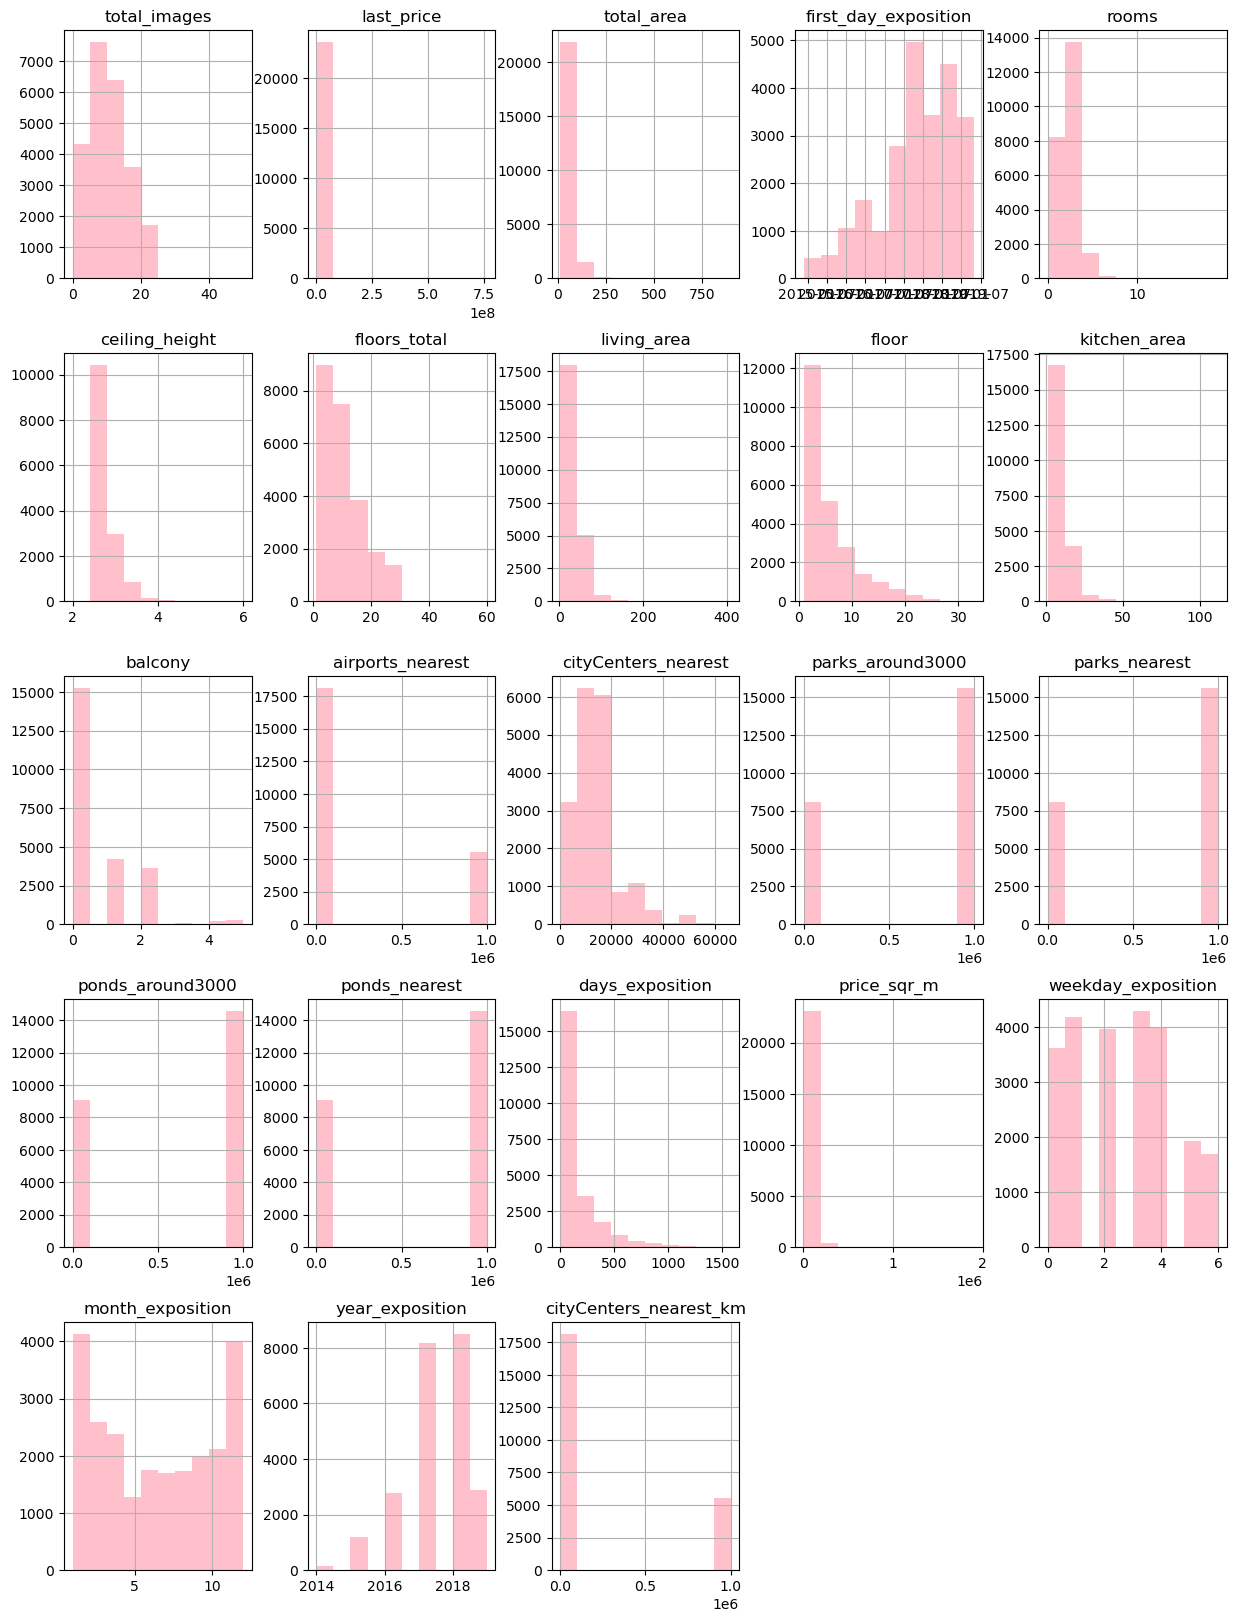

In [116]:
data.hist(figsize=(15, 20), color='pink')

**Вывод:**  
Файл был прочитан при помощи разделителя. Из исходных данных видно, что во многих колонках есть пропуски, а так же много колонок с неверным типом данных. Например, first_day_exposition должен быть типа datetime, а loors_total должен иметь тип int, так как это целые числа. Иправим это в следующем этапе. 


# Предобработка данных

Знакомимся с разбросом данных и ищем аномальные значения

In [13]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


Заменим пропуски в days_exposition на 0 и изменим тип данных на int

In [14]:
data['days_exposition'] = data['days_exposition'].fillna(0).astype('int')

Переведем столбец с датой в формат даты без времени

In [15]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format = '%Y-%m-%d')

Заменим пропуски в balcony на 0 и изменим тип данных на int

In [16]:
data['balcony'] = data['balcony'].fillna(0).astype('int')

В столбеце is_apartment пропущенные значения заменим на False

In [17]:
data['is_apartment'] = data['is_apartment'].fillna(False)

В last_price изменим тип данных на int

In [18]:
data['last_price'] = data['last_price'].astype('int')

В room изменим тип данных на int

In [19]:
data['rooms'] = data['rooms'].astype('int')

В столбцах с расстоянием заполняем пропуски большим значением

In [20]:
data['parks_nearest'] = data['parks_nearest'].fillna(1000000)
data['airports_nearest'] = data['airports_nearest'].fillna(1000000)
data['ponds_nearest'] = data['ponds_nearest'].fillna(1000000)

В столбцах с количеством заполняем пропуски нулем

In [21]:
data['parks_around3000'] = data['parks_nearest'].fillna(0)
data['ponds_around3000'] = data['ponds_nearest'].fillna(0)

Проверка уникальных значений столбца locality_name

In [22]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

Борьба с неявными дубликатами в столбце locality_name 

In [23]:
duplicates = ['поселок городского типа', 'городской поселок', 'поселок при железнодорожной станции', 'посёлок'] # список неправильных имён
name = 'поселок' # правильное имя
data['locality_name'] = data['locality_name'].replace(duplicates, name)

Анализ ceiling_height. Сортируем данные и смотрим список квартир, где потолки более 4 метров

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_sqr_m,weekday_exposition,month_exposition,year_exposition,floor_category,cityCenters_nearest_km
2802,7,14950000,50.0,2016-03-06,2,4.8,3.0,30.000000,2,False,...,589.0,161.0,161.0,160,299000.00,6,3,2016,другой,1.72
21923,10,115490000,235.0,2017-04-09,5,4.9,5.0,140.000000,5,False,...,652.0,253.0,253.0,351,491446.81,6,4,2017,последний,1.33
1053,13,550000,29.0,2018-02-01,1,5.0,3.0,16.379102,1,False,...,1000000.0,1000000.0,1000000.0,6,18965.52,3,2,2018,первый,1000000.00
464,15,66571000,280.3,2015-06-11,6,5.2,8.0,159.500000,7,False,...,187.0,616.0,616.0,578,237499.11,3,6,2015,другой,6.66
1026,20,155000000,310.0,2018-10-12,5,5.3,3.0,190.000000,3,False,...,1000000.0,603.0,603.0,0,500000.00,4,10,2018,последний,4.78
12628,14,3900000,50.0,2018-03-29,1,5.3,5.0,28.239831,5,False,...,505.0,92.0,92.0,8,78000.00,3,3,2018,последний,3.92
7578,17,38000000,143.0,2017-11-02,3,5.5,5.0,83.000000,5,False,...,479.0,1000000.0,1000000.0,0,265734.27,3,11,2017,последний,6.45
1388,20,59800000,399.0,2015-01-21,5,5.6,6.0,225.353853,6,False,...,149.0,577.0,577.0,719,149874.69,2,1,2015,последний,6.93
21227,0,8200000,71.0,2017-07-21,0,5.8,5.0,68.000000,5,False,...,295.0,366.0,366.0,30,115492.96,4,7,2017,последний,1.26
20264,17,119000000,187.6,2017-07-10,4,6.0,7.0,147.000000,7,False,...,484.0,305.0,305.0,259,634328.36,0,7,2017,последний,5.60


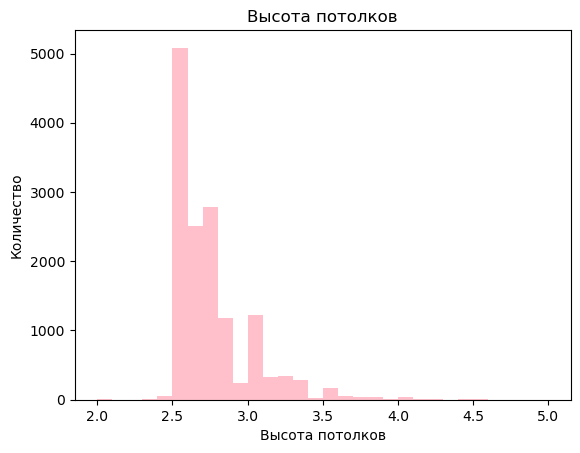

In [53]:
data['ceiling_height'].sort_values().plot(y = 'ceiling_height', kind = 'hist', 
                                          bins = 30, range=(2,5),title = 'Высота потолков', color='pink')
plt.xlabel("Высота потолков")
plt.ylabel("Количество")
data[data['ceiling_height'] > 4].sort_values('ceiling_height').tail(10)

Смотрим список квартир, где потолки менее 2 метров

In [25]:
data[data['ceiling_height'] < 2].sort_values('ceiling_height')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
22590,16,6000000,55.0,2018-10-31,2,1.00,12.0,32.4,7,False,...,10.00,0,Санкт-Петербург,33053.0,14217.0,293.0,293.0,289.0,289.0,13
5712,5,1500000,42.8,2017-08-14,2,1.20,2.0,27.5,1,False,...,5.20,0,городской посёлок Мга,1000000.0,NaN,1000000.0,1000000.0,1000000.0,1000000.0,248
16934,5,4100000,40.0,2017-10-17,1,1.75,37.0,17.4,5,False,...,8.34,0,Санкт-Петербург,18732.0,20444.0,1000000.0,1000000.0,80.0,80.0,71


Исправление ошибочных данных

In [26]:
data.loc[data['ceiling_height'] > 20, 'ceiling_height'] /= 10

Отбрасываем аномально большие значения и любуемся результатом

In [27]:
data = data.drop(data[data['ceiling_height'] < 2].index)
data = data.drop(data[data['ceiling_height'] >= 8].index)
data[data['ceiling_height'] > 4].sort_values('ceiling_height').tail(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
2802,7,14950000,50.0,2016-03-06,2,4.8,3.0,30.0,2,False,...,10.0,0,Санкт-Петербург,24433.0,1725.0,589.0,589.0,161.0,161.0,160
21923,10,115490000,235.0,2017-04-09,5,4.9,5.0,140.0,5,False,...,50.0,0,Санкт-Петербург,22777.0,1328.0,652.0,652.0,253.0,253.0,351
1053,13,550000,29.0,2018-02-01,1,5.0,3.0,NaN,1,False,...,NaN,0,Бокситогорск,1000000.0,NaN,1000000.0,1000000.0,1000000.0,1000000.0,6
464,15,66571000,280.3,2015-06-11,6,5.2,8.0,159.5,7,False,...,21.1,0,Санкт-Петербург,26316.0,6655.0,187.0,187.0,616.0,616.0,578
1026,20,155000000,310.0,2018-10-12,5,5.3,3.0,190.0,3,False,...,63.0,2,Санкт-Петербург,24899.0,4785.0,1000000.0,1000000.0,603.0,603.0,0
12628,14,3900000,50.0,2018-03-29,1,5.3,5.0,NaN,5,False,...,NaN,0,Санкт-Петербург,19644.0,3918.0,505.0,505.0,92.0,92.0,8
7578,17,38000000,143.0,2017-11-02,3,5.5,5.0,83.0,5,False,...,29.0,1,Санкт-Петербург,26333.0,6448.0,479.0,479.0,1000000.0,1000000.0,0
1388,20,59800000,399.0,2015-01-21,5,5.6,6.0,NaN,6,False,...,NaN,0,Санкт-Петербург,26204.0,6934.0,149.0,149.0,577.0,577.0,719
21227,0,8200000,71.0,2017-07-21,0,5.8,5.0,68.0,5,False,...,NaN,0,Санкт-Петербург,20170.0,1261.0,295.0,295.0,366.0,366.0,30
20264,17,119000000,187.6,2017-07-10,4,6.0,7.0,147.0,7,False,...,15.6,0,Санкт-Петербург,26902.0,5605.0,484.0,484.0,305.0,305.0,259


Анализируем аномально большие значения в total_area (и с ними все в порядке)

In [28]:
data[data['total_area'] > 400].sort_values('total_area').tail(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
12401,20,91500000,495.0,2017-06-19,7,4.65,7.0,347.5,7,False,...,25.0,0,Санкт-Петербург,1000000.0,5735.0,110.0,110.0,1000000.0,1000000.0,14
5893,3,230000000,500.0,2017-05-31,6,NaN,7.0,NaN,7,False,...,40.0,0,Санкт-Петербург,32440.0,5297.0,1000000.0,1000000.0,198.0,198.0,50
15016,8,150000000,500.0,2016-01-13,4,3.20,7.0,NaN,7,False,...,NaN,0,Санкт-Петербург,33058.0,6150.0,209.0,209.0,531.0,531.0,303
8018,20,84000000,507.0,2015-12-17,5,4.45,7.0,301.5,7,True,...,45.5,1,Санкт-Петербург,1000000.0,5735.0,110.0,110.0,1000000.0,1000000.0,1078
4237,1,50000000,517.0,2017-10-14,7,NaN,4.0,332.0,3,False,...,22.0,0,Санкт-Петербург,22835.0,1847.0,477.0,477.0,540.0,540.0,0
5358,20,65000000,590.0,2019-02-14,15,3.50,6.0,409.0,3,False,...,100.0,0,Санкт-Петербург,24447.0,4666.0,767.0,767.0,1000000.0,1000000.0,14
15651,20,300000000,618.0,2017-12-18,7,3.40,7.0,258.0,5,False,...,70.0,0,Санкт-Петербург,32440.0,5297.0,1000000.0,1000000.0,198.0,198.0,111
3117,19,140000000,631.0,2019-03-30,7,NaN,5.0,NaN,5,False,...,60.0,0,Санкт-Петербург,25707.0,4972.0,1000000.0,1000000.0,210.0,210.0,0
12859,20,140000000,631.2,2019-04-09,7,3.90,4.0,322.3,4,False,...,19.5,1,Санкт-Петербург,25707.0,4972.0,1000000.0,1000000.0,210.0,210.0,0
19540,8,420000000,900.0,2017-12-06,12,2.80,25.0,409.7,25,False,...,112.0,0,Санкт-Петербург,30706.0,7877.0,1000000.0,1000000.0,318.0,318.0,106


Анализируем аномально маленькие значения в total_area (благо, что их нет)

In [29]:
data[data['total_area'] < 10].sort_values('total_area').tail(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


Анализируем аномально маленькие значения в last_price 

In [30]:
data[data['last_price'] < 100000].sort_values('total_area')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
8793,7,12190,109.0,2019-03-20,2,2.75,25.0,32.0,25,False,...,40.5,0,Санкт-Петербург,36421.0,9176.0,805.0,805.0,1000000.0,1000000.0,8


Избавляемся от него

In [31]:
data = data.drop(data[data['last_price'] < 100000].index)

Замена пропусков в living_area на средние значения соотношения жилой и общей прощади

In [32]:
area = data['living_area']/data['total_area']
area_mean = area.mean()
data['living_area'] = data['living_area'].fillna(data['total_area'] * area_mean)
data['living_area'].describe()

count    23687.000000
mean        34.566259
std         22.330705
min          2.000000
25%         19.000000
50%         30.000000
75%         42.100000
max        409.700000
Name: living_area, dtype: float64

**Вывод:**  
Ознакомились с разбросом даннах и выявили аномальные значения.  
В days_exposition заполнили пропуски нулями, а также поменяли тип данных на целочисленный, так как количество дней - целое число.  
В first_day_exposition поменяли тип данных на datetime для более удобного доступа к этим данным и наглядности.  
В balcony заменили пропуски на нули, так как если количество балконов не указано, то можно полагаться на их отсутствие вовсе. Изменили тип данных на int, так как количество балконов - целое число.  
В is_apartment пропущенные значения заменили на False.  
В last_price изменили тип данных на int, так как цена - целое число. Так же избавились от строки с аномально низким значением.  
В столбцах с расстоянием заполнили пропуски большим значением, так как если расстояние не указано, то можно предположить, что ни водоема, ни аэропорта, ни парка рядом нет.  
Пропущенные значения в locality_name менять не будем, так как их причина не ясна, а вот от дубликатом можно избавиться, если проанализировать уникаьные значения этой колонки, что мы и провернули выше.  
В ceiling_height избавились от аномально больших и малых значений (благо таких строк было мало) и подкорректировали существующие большие данные делением на 10. Эта путаница могла произойти из за неверных едениц измерения.  
Анализируя total_area можно предположить, что с данными все в порядке, так как действительно бывают очень большие площади. 
В living_area заменили пропуски на средние значения соотношения жилой и общей прощади.  
В room заменили тип данных на целочисленный, так как количество комнат - целое число.

# Посчет и добавление в таблицу новых столбцов

Подсчет цены квадратного метра

In [33]:
data['price_sqr_m'] = round(data['last_price'] / data['total_area'], 2)

Добавляем столбец дня недели публикации объвления 

In [34]:
data['weekday_exposition'] = data['first_day_exposition'].dt.weekday

Добавляем столбец месяца публикации объвления

In [35]:
data['month_exposition'] = data['first_day_exposition'].dt.month

Добавляем столбец года публикации объвления

In [36]:
data['year_exposition'] = data['first_day_exposition'].dt.year

Функция категоризации по этажам

In [37]:
def floor_category(row):
    floors_total = row['floors_total']
    floor = row['floor']
    if floor == 1:
        return 'первый'
    elif floor == floors_total:
        return 'последний'
    elif 1 < floor < floors_total:
        return 'другой'

Добавляем столбец с результатами применения функции floor_category  

In [38]:
data['floor_category'] = data.apply(floor_category, axis = 1)

Добавляем столбец с расстоянием в км до центра города и сразу заполняем пропуски большим числом

In [39]:
data['cityCenters_nearest_km'] = round(data['cityCenters_nearest']/1000, 2)
data['cityCenters_nearest_km'] = data['cityCenters_nearest_km'].fillna(1000000)

Любуемся

In [40]:
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_sqr_m,weekday_exposition,month_exposition,year_exposition,floor_category,cityCenters_nearest_km
0,20,13000000,108.00,2019-03-07,3,2.70,16.0,51.000000,8,False,...,482.0,755.0,755.0,0,120370.37,3,3,2019,другой,16.03
1,7,3350000,40.40,2018-12-04,1,NaN,11.0,18.600000,1,False,...,1000000.0,1000000.0,1000000.0,81,82920.79,1,12,2018,первый,18.60
2,10,5196000,56.00,2015-08-20,2,NaN,5.0,34.300000,4,False,...,90.0,574.0,574.0,558,92785.71,3,8,2015,другой,13.93
3,0,64900000,159.00,2015-07-24,3,NaN,14.0,89.802663,9,False,...,84.0,234.0,234.0,424,408176.10,4,7,2015,другой,6.80
4,2,10000000,100.00,2018-06-19,2,3.03,14.0,32.000000,13,False,...,112.0,48.0,48.0,121,100000.00,1,6,2018,другой,8.10
5,10,2890000,30.40,2018-09-10,1,NaN,12.0,14.400000,5,False,...,1000000.0,1000000.0,1000000.0,55,95065.79,0,9,2018,другой,1000000.00
6,6,3700000,37.30,2017-11-02,1,NaN,26.0,10.600000,6,False,...,1000000.0,1000000.0,1000000.0,155,99195.71,3,11,2017,другой,19.14
7,5,7915000,71.60,2019-04-18,2,NaN,24.0,40.439438,22,False,...,1000000.0,1000000.0,1000000.0,0,110544.69,3,4,2019,другой,11.63
8,20,2900000,33.16,2018-05-23,1,NaN,27.0,15.430000,26,False,...,1000000.0,1000000.0,1000000.0,189,87454.76,2,5,2018,другой,1000000.00
9,18,5400000,61.00,2017-02-26,3,2.50,9.0,43.600000,7,False,...,1000000.0,1000000.0,1000000.0,289,88524.59,6,2,2017,другой,15.01


**Вывод:**  
Посчитали и добавили новые колонки в таблицу для дальнейшей работы с ними.


# Исследовательский анализ данных

Общая площадь

count    23687.000000
mean        60.351272
std         35.659018
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64

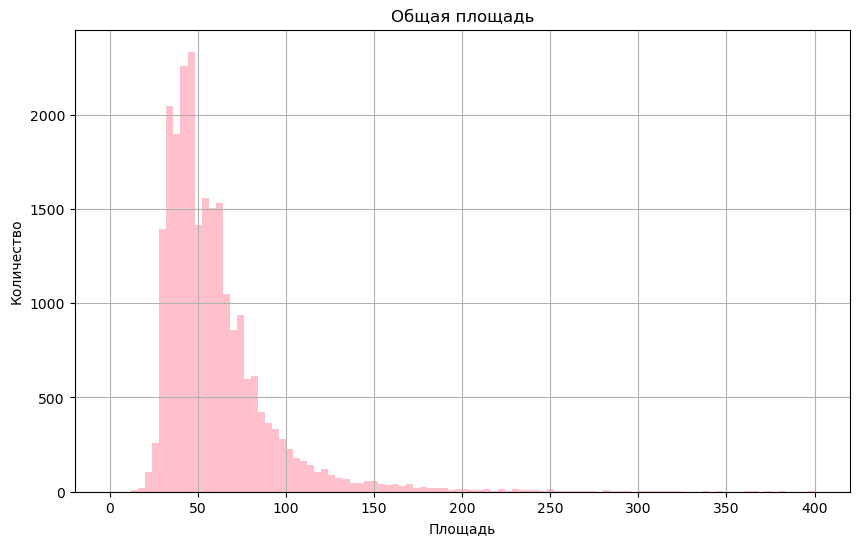

In [55]:
data.plot(y = 'total_area', kind = 'hist', bins = 100, grid=True, figsize = (10,6), range = (0,400), 
          title='Общая площадь', color='pink', legend=False)
plt.ylabel("Количество")
plt.xlabel("Площадь")
data['total_area'].describe()

Жилая площадь

count    23687.000000
mean        34.566259
std         22.330705
min          2.000000
25%         19.000000
50%         30.000000
75%         42.100000
max        409.700000
Name: living_area, dtype: float64

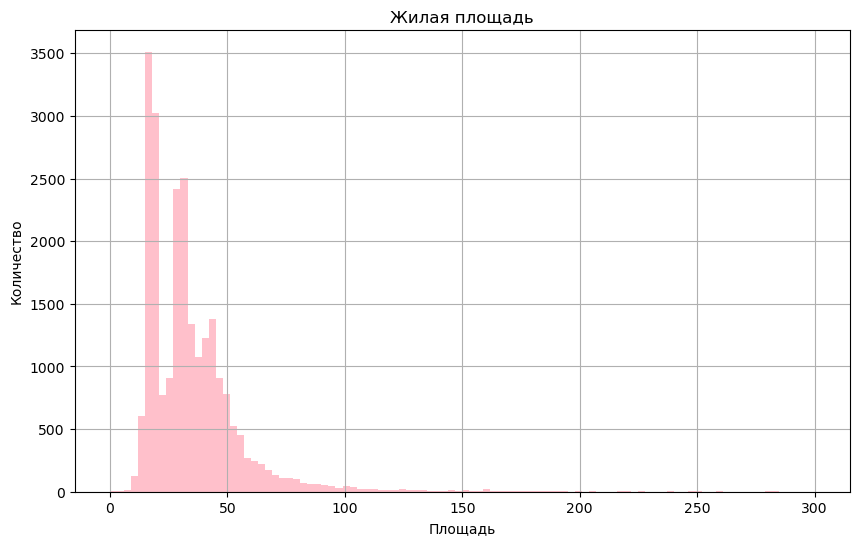

In [56]:
data.plot(y = 'living_area', kind = 'hist', bins = 100, grid=True, figsize = (10,6), 
          range = (0,300), title='Жилая площадь', color='pink', legend=False)
plt.ylabel("Количество")
plt.xlabel("Площадь")
data['living_area'].describe()

In [43]:
data['living_area'].value_counts()

18.000000    882
17.000000    675
30.000000    598
16.000000    486
20.000000    481
            ... 
52.770000      1
91.240000      1
32.050000      1
35.497468      1
43.348141      1
Name: living_area, Length: 2441, dtype: int64

Площадь кухни

count    21411.000000
mean        10.569151
std          5.903033
min          1.300000
25%          7.000000
50%          9.100000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64

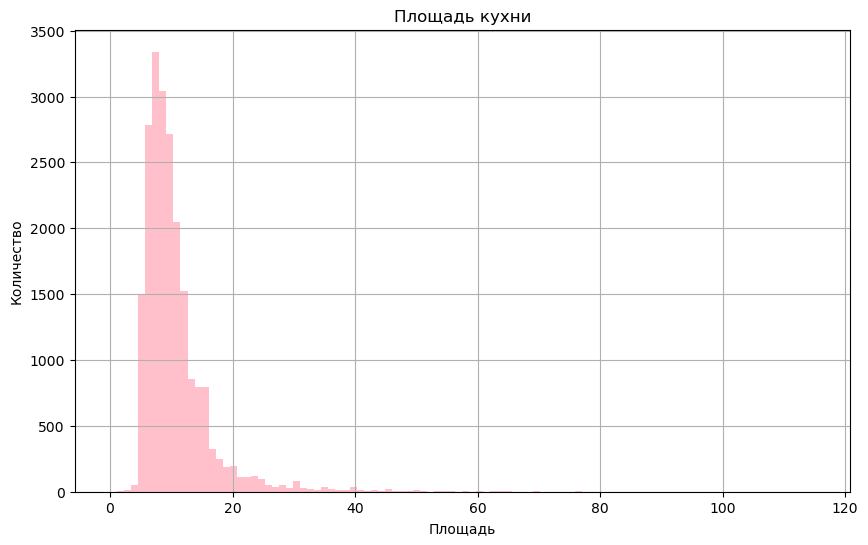

In [57]:
data.plot(y = 'kitchen_area', kind = 'hist', bins = 100, grid=True, figsize = (10,6), 
          range = (0,115), title='Площадь кухни', color='pink', legend=False)
plt.ylabel("Количество")
plt.xlabel("Площадь")
data['kitchen_area'].describe()

Цена объекта

count    2.368700e+04
mean     6.542236e+06
std      1.088943e+07
min      4.300000e+05
25%      3.400000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64

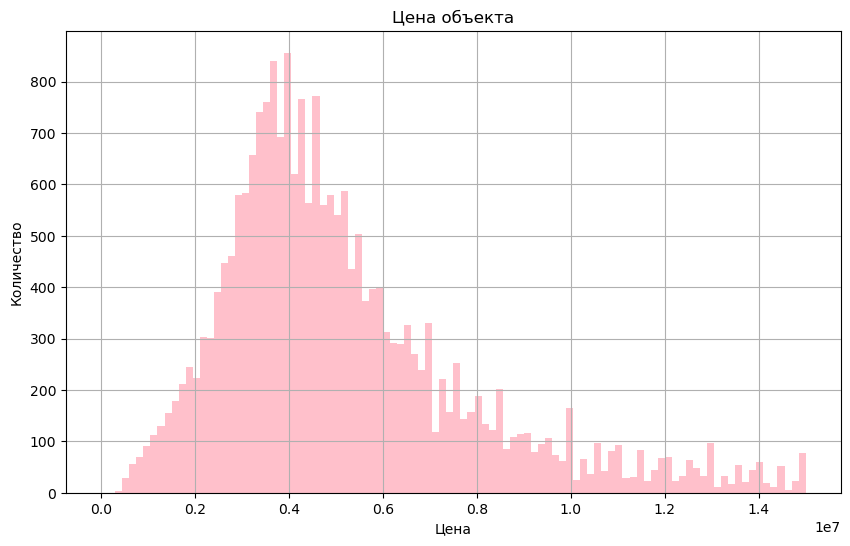

In [58]:
data.plot(y = 'last_price', kind = 'hist', bins = 100, grid=True, 
          range = (0,15000000), figsize = (10,6), title='Цена объекта', color='pink', legend=False)
plt.ylabel("Количество")
plt.xlabel("Цена")
data['last_price'].describe()

Количество комнат

count    23687.000000
mean         2.070798
std          1.078532
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

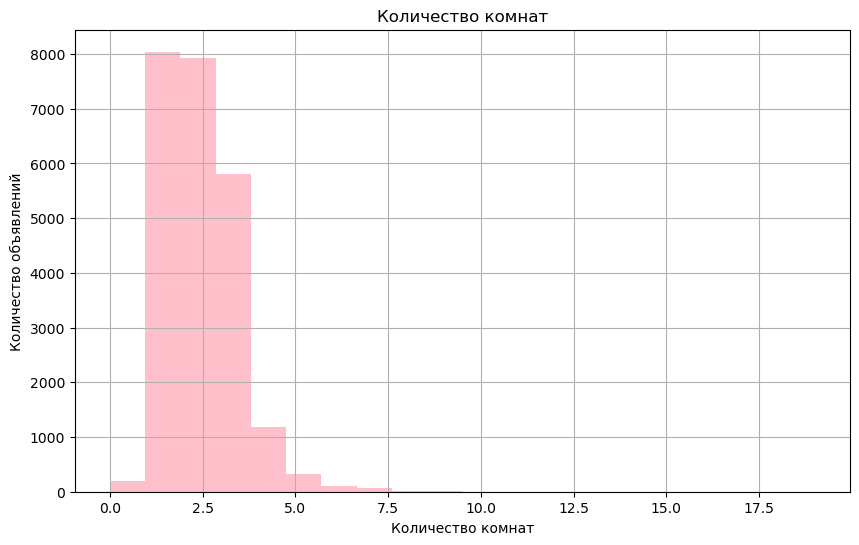

In [59]:
data.plot(y = 'rooms', kind = 'hist', bins = 20, grid=True, figsize = (10, 6), 
          title='Количество комнат', color='pink', legend=False)
plt.ylabel("Количество объявлений")
plt.xlabel("Количество комнат")
data['rooms'].describe()

In [47]:
data['rooms'].value_counts()

1     8042
2     7935
3     5812
4     1180
5      326
0      197
6      105
7       59
8       12
9        8
10       3
11       2
14       2
15       1
19       1
16       1
12       1
Name: rooms, dtype: int64

Высота потолков

count    14492.000000
mean         2.726672
std          0.278656
min          2.000000
25%          2.510000
50%          2.650000
75%          2.800000
max          6.000000
Name: ceiling_height, dtype: float64

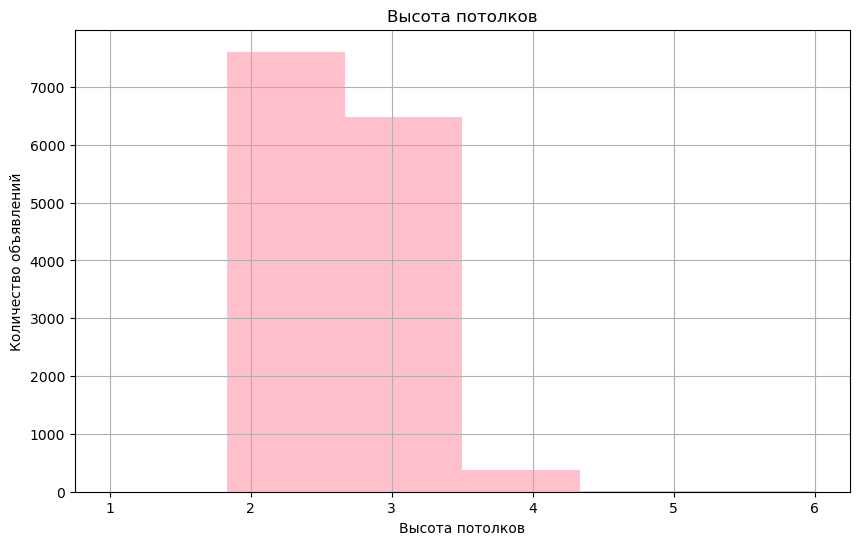

In [60]:
data.plot(y = 'ceiling_height', kind = 'hist', bins = 6, range = (1,6), grid=True, figsize = (10, 6), 
          title='Высота потолков', color='pink', legend=False)
plt.ylabel("Количество объявлений")
plt.xlabel("Высота потолков")
data['ceiling_height'].describe()

Этаж квартиры

count    23687.000000
mean         5.891291
std          4.883629
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64

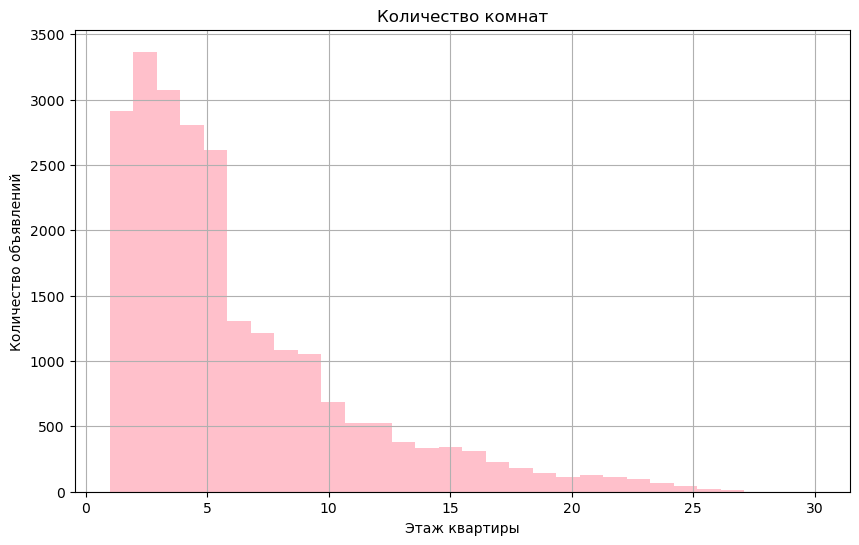

In [61]:
data.plot(y = 'floor', kind = 'hist', bins = 30, range = (1,30), grid=True, figsize = (10, 6), 
          title='Количество комнат', color='pink', legend=False)
plt.ylabel("Количество объявлений")
plt.xlabel("Этаж квартиры")
data['floor'].describe()

Категория этажа квартиры

count      23604
unique         3
top       другой
freq       17355
Name: floor_category, dtype: object

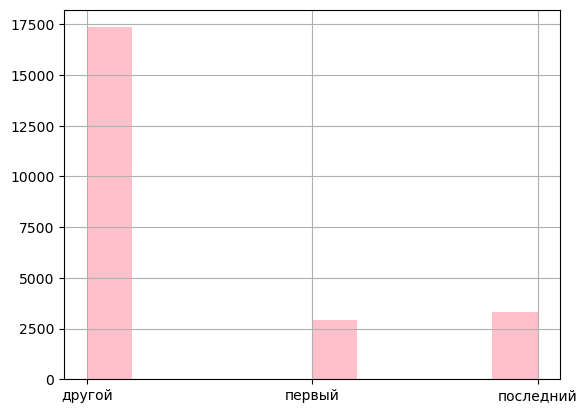

In [67]:
data['floor_category'].hist(color='pink')
data['floor_category'].describe()

Общее количество этажей в доме

count    23601.000000
mean        10.672048
std          6.594970
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

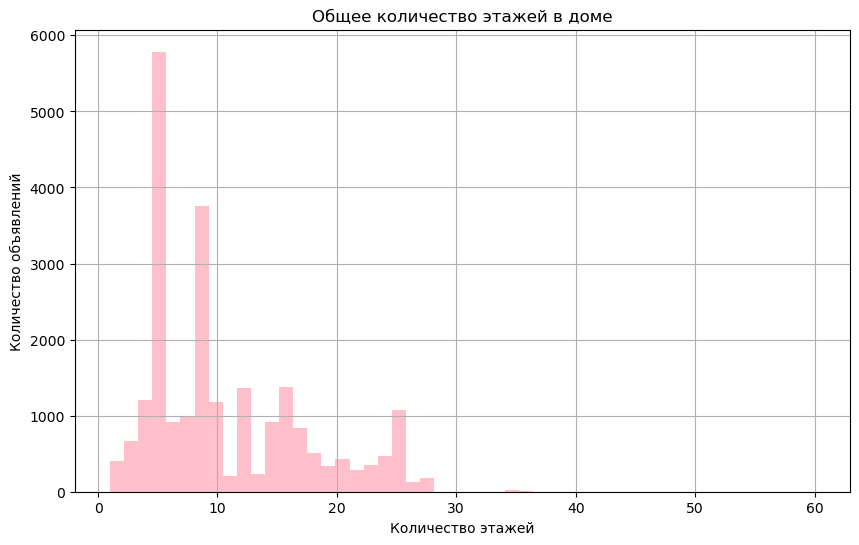

In [94]:
data.plot(y = 'floors_total', kind = 'hist', bins = 50, range = (1,60), grid=True, figsize = (10, 6), 
          title='Общее количество этажей в доме', color='pink', legend=False)
plt.ylabel("Количество объявлений")
plt.xlabel("Количество этажей")
data['floors_total'].describe()

Расстояние до центра города в метрах

count    18170.000000
mean     14191.239020
std       8609.733681
min        181.000000
25%       9238.000000
50%      13098.500000
75%      16293.000000
max      65968.000000
Name: cityCenters_nearest, dtype: float64

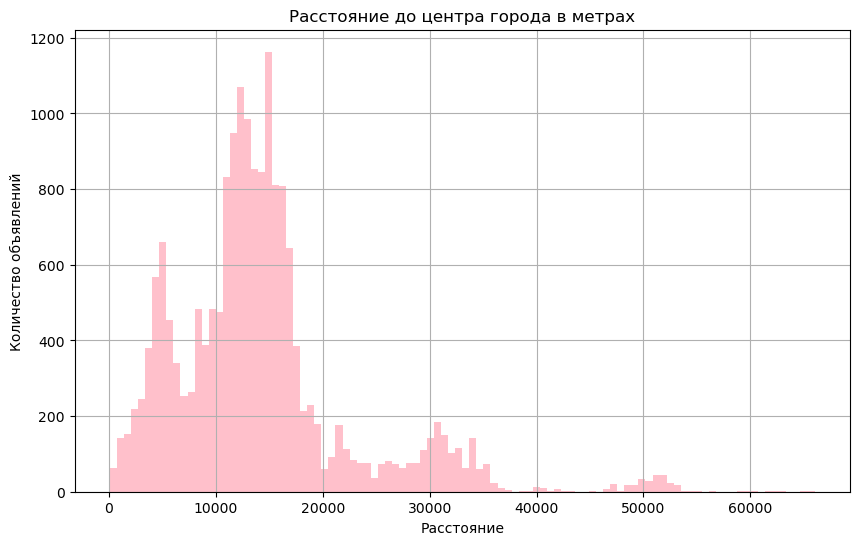

In [96]:
data.plot(y = 'cityCenters_nearest', kind = 'hist', bins = 100, range = (100,66000), grid=True, figsize = (10, 6), 
          title='Расстояние до центра города в метрах', color='pink', legend=False)
plt.ylabel("Количество объявлений")
plt.xlabel("Расстояние")
data['cityCenters_nearest'].describe()

Расстояние до ближайшего аэропорта

count      23687.000000
mean      255944.006290
std       411267.374062
min            0.000000
25%        21187.500000
50%        33557.000000
75%        54185.500000
max      1000000.000000
Name: airports_nearest, dtype: float64

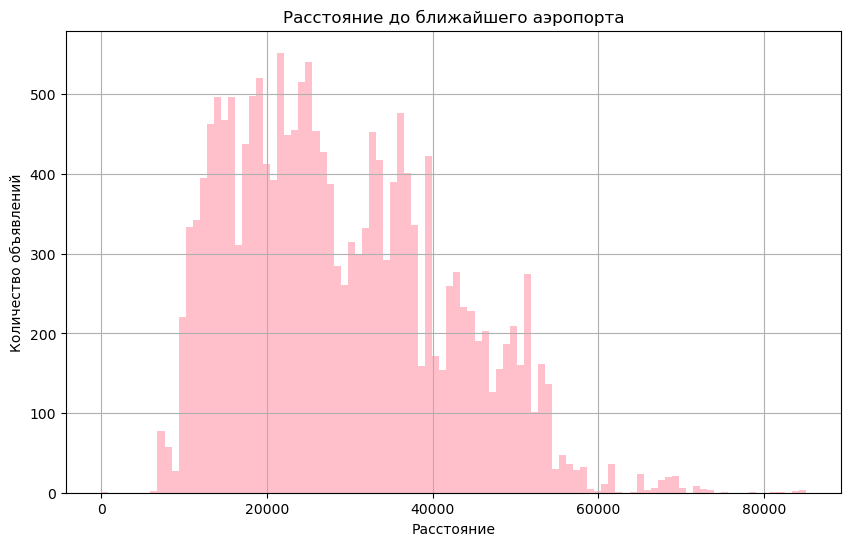

In [97]:
data.plot(y = 'airports_nearest', kind = 'hist', bins = 100, range = (0,85000), grid=True, figsize = (10, 6), 
          title='Расстояние до ближайшего аэропорта', color='pink', legend=False)
plt.ylabel("Количество объявлений")
plt.xlabel("Расстояние")
data['airports_nearest'].describe()

Расстояние до ближайшего парка

count      23687.000000
mean      659347.395576
std       473762.335636
min            1.000000
25%          601.000000
50%      1000000.000000
75%      1000000.000000
max      1000000.000000
Name: parks_nearest, dtype: float64

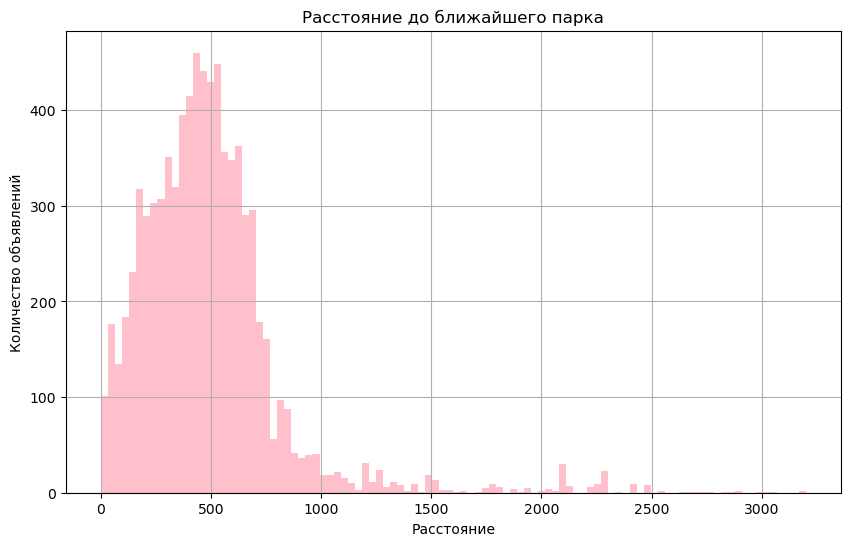

In [98]:
data.plot(y = 'parks_nearest', kind = 'hist', bins = 100, range = (1,3200), grid=True, figsize = (10, 6), 
          title='Расстояние до ближайшего парка', color='pink', legend=False)
plt.ylabel("Количество объявлений")
plt.xlabel("Расстояние")
data['parks_nearest'].describe()

День и месяц публикации объявления

count    23687.000000
mean         2.569426
std          1.789213
min          0.000000
25%          1.000000
50%          3.000000
75%          4.000000
max          6.000000
Name: weekday_exposition, dtype: float64


count    23687.000000
mean         6.399882
std          3.491817
min          1.000000
25%          3.000000
50%          6.000000
75%         10.000000
max         12.000000
Name: month_exposition, dtype: float64

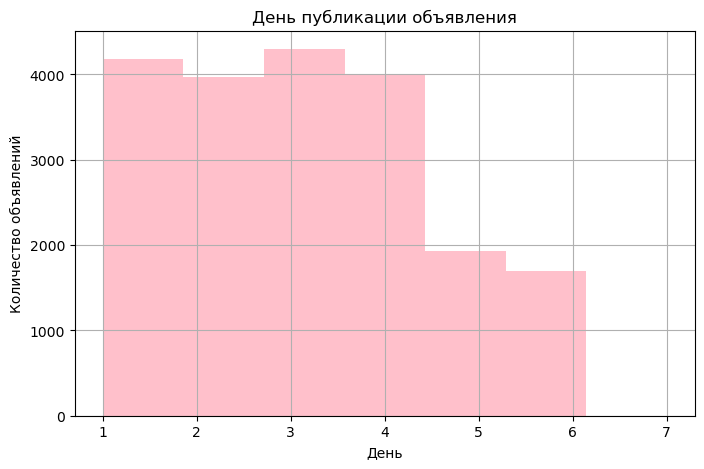

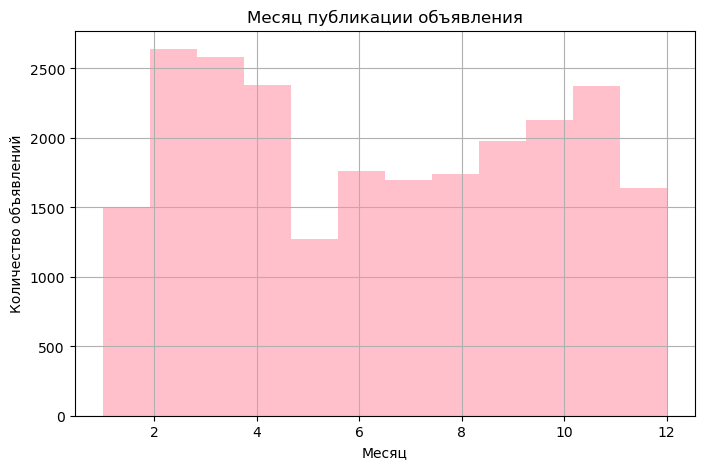

In [100]:
data.plot(y = 'weekday_exposition', kind = 'hist', bins = 7, range = (1,7), grid=True, figsize = (8, 5), 
          title='День публикации объявления', color='pink', legend=False)
plt.ylabel("Количество объявлений")
plt.xlabel("День")
print(data['weekday_exposition'].describe())
data.plot(y = 'month_exposition', kind = 'hist', bins = 12, range = (1,12), grid=True, figsize = (8, 5), 
          title='Месяц публикации объявления', color='pink', legend=False)
plt.ylabel("Количество объявлений")
plt.xlabel("Месяц")
data['month_exposition'].describe()

**Вывод:** 
 - Общая площадь в нашей выборке колеблется от 12 до 900 $м^2$, среднее значение 60, а медиана 52 $м^2$. 
 - Жилая площадь колеблется от 2 до 409 $м^2$, среднее значение 30, а медиана 34.5 $м^2$. Есть выбросы на значениях 18, 17, 30 $м^2$. Можно предположить, что подобные значения самые популярные и стандартные.
 - Площадь кухни колеблется от 1 до 112 $м^2$. Среднее - 10, а медиана - 9 $м^2$.  
 - Цены на недвижимость имеют разброс от 0,43 до 76,3 млн руб., среднее значение - 6,5 млн руб., медиана - 4,6 млн руб.  
 - Количество комнат колеблется от 1 до 19. Самыми популярными количеством комнат являются 1, 2, 3 и 4.   
 - Высота потолков в среднем составляет 2,72 м, а медиана 2,65 м.  
 - Этаж квартир колеблется от 1 до 33. Самые популярные этажи с 1 по 5. Медиана - 4, среднее - 5,8. 
 - Не самыми популярными являются категории этажей первый и последний.  
 - Количество этажей в доме имеет разброс от 1 до 60. Самые частовстречающиеся дома - пятиэтажные и девятиэтажные. Среднее - 10, медиана - 9.  
 - Большинство недвижимости расположено в 10 - 20 км от центра города. Среднее 15 км, медиана - 13 км.  
 - Самое популярное расстояние до аэропорта 10 - 40 км. Медиана - 33,5 км.  
 - Основное количество кварир расположенно в максимум километре от парка. Самое популярное значение - 500 м. 
 - Самые популярные дни для размещения объявлений с пн по чт. Самые популярные месяцы с февраля по апрель, а также октярь и ноябрь.  
 - В данных присутствуют аномальные значения такие как, напрмер, 0 комнат. Об этом нужно уточнить у людей, что эти данные предоставили. 

## Как быстро продавались квартиры?

Диаграмма размаха

Text(0.5, 0, 'Количество дней')

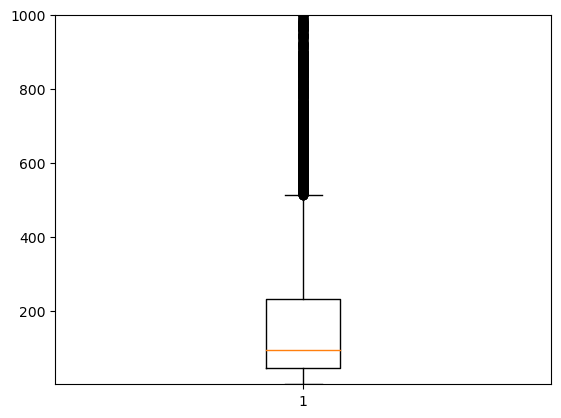

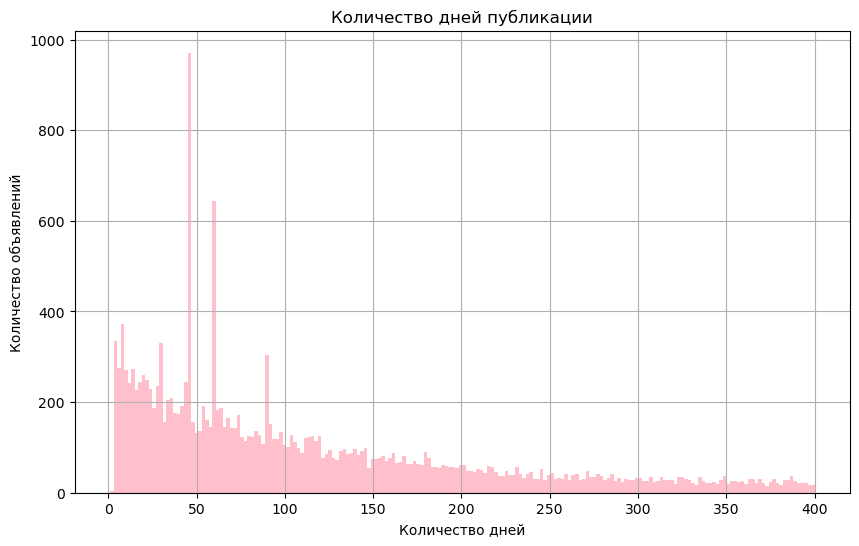

In [101]:
plt.boxplot(data[data['days_exposition']!=0]['days_exposition'])
plt.ylim(1,1000)

data.plot(y = 'days_exposition', kind = 'hist', bins = 200, grid = True, range = (1,400), figsize = (10, 6), 
          title='Количество дней публикации', color='pink', legend=False)
plt.ylabel("Количество объявлений")
plt.xlabel("Количество дней")

Среднее значение, медиана и межквартильный размах

In [74]:
data[data['days_exposition']!=0]['days_exposition'].describe()

count    20507.000000
mean       180.893402
std        219.751326
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

Уточнили

In [75]:
data[data['days_exposition']!=0]['days_exposition'].value_counts()

45      880
60      538
7       234
30      208
90      204
       ... 
1021      1
1362      1
1105      1
795       1
971       1
Name: days_exposition, Length: 1141, dtype: int64

Анализируем список, дабы убедиться, что строки никак не связаны между собой

In [76]:
data[data['days_exposition']==60]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_sqr_m,weekday_exposition,month_exposition,year_exposition,floor_category,cityCenters_nearest_km
22,20,5000000,58.0,2017-04-24,2,2.75,25.0,30.000000,15,False,...,1000000.0,1000000.0,1000000.0,60,86206.90,0,4,2017,другой,1000000.00
82,3,4500000,80.5,2018-01-15,3,NaN,25.0,45.466128,16,False,...,1000000.0,1000000.0,1000000.0,60,55900.62,0,1,2018,другой,18.22
105,12,4900000,32.0,2018-01-07,1,NaN,25.0,15.000000,5,False,...,1000000.0,464.0,464.0,60,153125.00,6,1,2018,другой,15.60
118,8,4500000,31.0,2019-02-24,1,2.50,9.0,17.000000,4,False,...,1000000.0,439.0,439.0,60,145161.29,6,2,2019,другой,9.09
143,9,2990000,30.0,2016-06-08,1,2.50,9.0,20.000000,9,False,...,1000000.0,332.0,332.0,60,99666.67,2,6,2016,последний,6.26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23577,10,3750000,45.0,2016-06-14,2,NaN,5.0,30.000000,1,False,...,1000000.0,1000000.0,1000000.0,60,83333.33,1,6,2016,первый,32.48
23600,8,8700000,132.0,2018-11-13,3,2.65,9.0,78.000000,3,False,...,1000000.0,1000000.0,1000000.0,60,65909.09,1,11,2018,другой,17.88
23621,11,5000000,37.9,2017-08-31,1,2.60,21.0,18.900000,14,False,...,1000000.0,1000000.0,1000000.0,60,131926.12,3,8,2017,другой,13.96
23635,9,5100000,36.0,2018-10-26,1,2.80,15.0,18.000000,11,False,...,1000000.0,405.0,405.0,60,141666.67,4,10,2018,другой,11.67


Исключаем выбивающиеся значения из датафрейма

In [77]:
good_data = data.query(
    'days_exposition != 45 and days_exposition != 30 and days_exposition != 60 and days_exposition != 90 and days_exposition != 7 and days_exposition != 0')


Диаграмма размаха

(1.0, 1000.0)

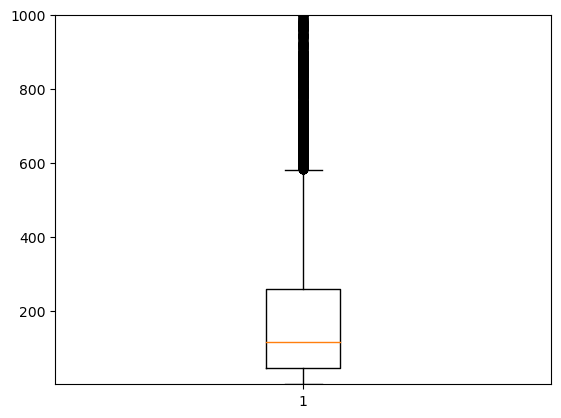

In [78]:
plt.boxplot(good_data['days_exposition'])
plt.ylim(1,1000)

Гистограмма

Text(0.5, 0, 'Количество дней')

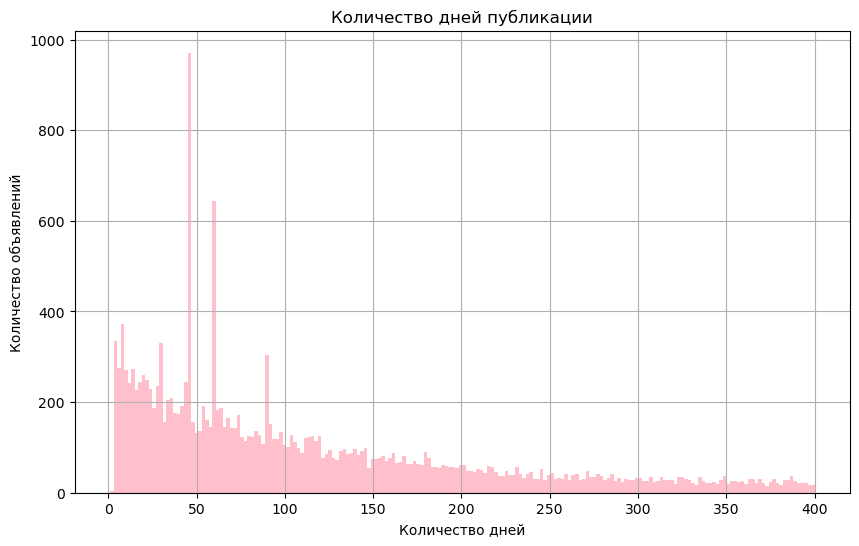

In [102]:
data.plot(y = 'days_exposition', kind = 'hist', bins = 200, grid = True, range = (1,400), figsize = (10, 6), 
          title='Количество дней публикации', color='pink', legend=False)
plt.ylabel("Количество объявлений")
plt.xlabel("Количество дней")

Среднее значение, медиана и межквартильный размах

In [80]:
good_data['days_exposition'].describe()

count    18443.000000
mean       195.817546
std        226.788642
min          1.000000
25%         44.000000
50%        114.000000
75%        259.000000
max       1580.000000
Name: days_exposition, dtype: float64

**Вывод:**  
В гистограмме количества дней размещения публикации можно увидеть, что есть аномальные значения 7, 30, 45, 60 и 90.  
Снятые объявление, на сколько я могу судить, никак между собой не связаны. Предполагаю, что они появидись из за того, что система автоматически снимает объявление по истичению этих дней. Поэтому от этих значений можно избавиться, чтоб очистить выборку и получить более верные данные о датах продажи квартир. А вообще, такое лучше уточнять у сборщиков данных.  
После очистки данных мы получили среднее значение в 195 дней и медиану в 114 дней, что более правдоподобно. 

## Какие факторы больше всего влияют на общую (полную) стоимость объекта?

Зависимость общей (полной) стоимости объекта от общей площади квартиры

0.6538009117310204

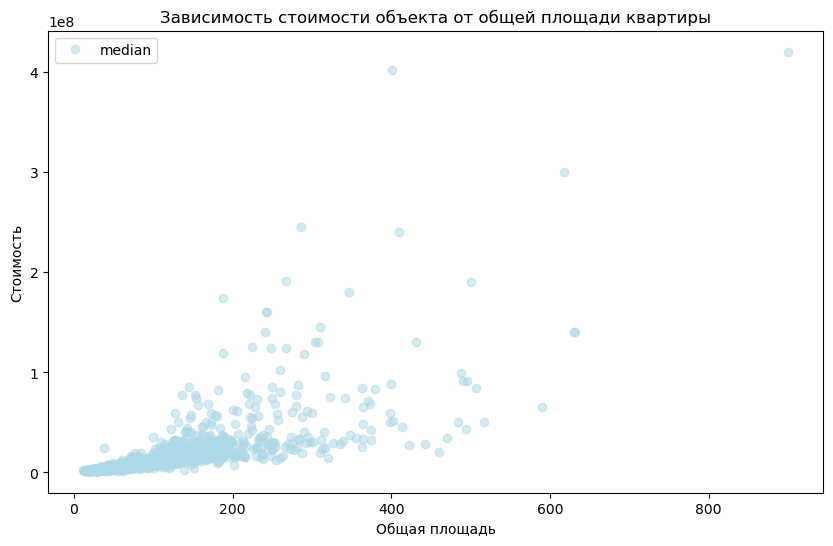

In [106]:
pivot_table_total_area = data.pivot_table(index = 'total_area', values = 'last_price',
                                          aggfunc = ['mean', 'count', 'median'])
pivot_table_total_area.columns = ['mean', 'count', 'median']
pivot_table_total_area.plot(y = 'median', style = 'o', alpha = 0.5, figsize = (10, 6), 
          title='Зависимость стоимости объекта от общей площади квартиры', color='lightblue', legend=False)
plt.ylabel("Стоимость")
plt.xlabel("Общая площадь")
pivot_table_total_area.sort_values('median', ascending = False)

data['total_area'].corr(data['last_price'])

Зависимость общей (полной) стоимости объекта от жилой площади квартиры


0.5857199631194361

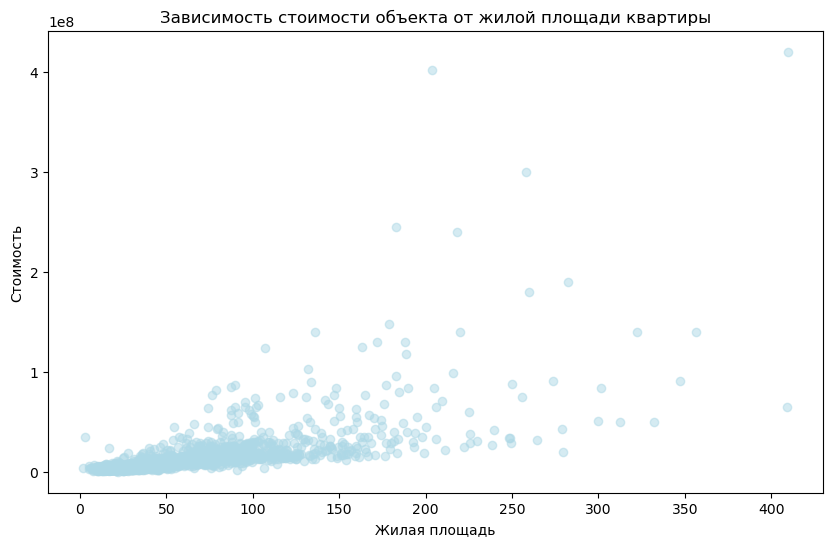

In [107]:
pivot_table_total_area = data.pivot_table(index = 'living_area', values = 'last_price',
                                          aggfunc = ['mean', 'count', 'median'])
pivot_table_total_area.columns = ['mean', 'count', 'median']
pivot_table_total_area.plot(y = 'median', style = 'o', alpha = 0.5, figsize = (10, 6), 
          title='Зависимость стоимости объекта от жилой площади квартиры', color='lightblue', legend=False)
plt.ylabel("Стоимость")
plt.xlabel("Жилая площадь")
pivot_table_total_area.sort_values('median', ascending = False)

data['living_area'].corr(data['last_price'])

Зависимость общей (полной) стоимости объекта от площади кухни

0.5203354511775631

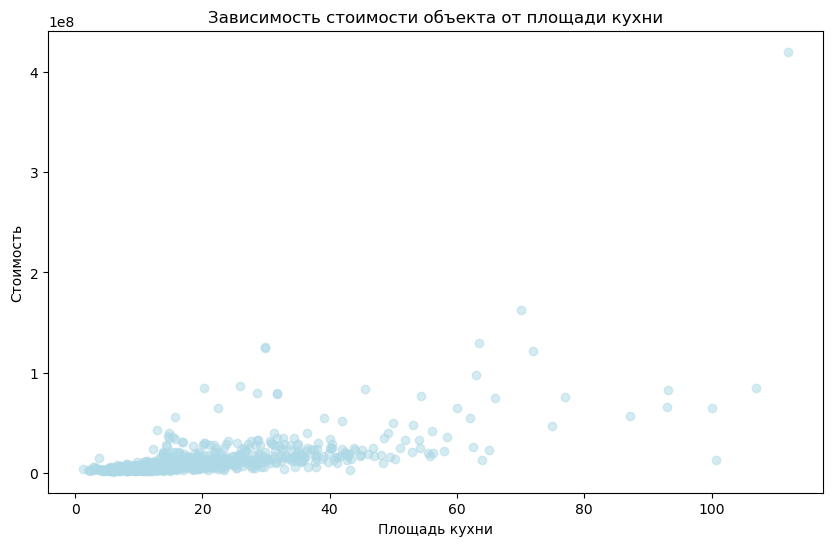

In [108]:
pivot_table_total_area = data.pivot_table(index = 'kitchen_area', values = 'last_price', 
                                          aggfunc = ['mean', 'count', 'median'])
pivot_table_total_area.columns = ['mean', 'count', 'median']
pivot_table_total_area.plot(y = 'median', style = 'o', alpha = 0.5, figsize = (10, 6), 
          title='Зависимость стоимости объекта от площади кухни', color='lightblue', legend=False)
plt.ylabel("Стоимость")
plt.xlabel("Площадь кухни")
pivot_table_total_area.sort_values('median', ascending = False)

data['kitchen_area'].corr(data['last_price'])

Зависимость общей (полной) стоимости объекта от количества комнат

0.36339784989929236

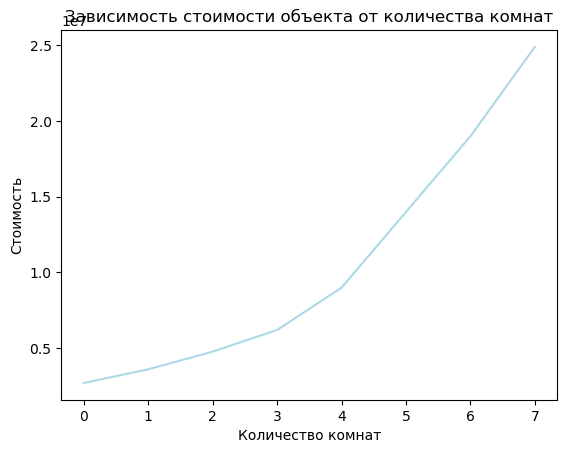

In [109]:
pivot_table_rooms = data.pivot_table(index = 'rooms', values = 'last_price', 
                                     aggfunc = ['mean', 'count', 'median'])
pivot_table_rooms.columns = ['mean', 'count', 'median']
pivot_table_rooms.query('count > 50').plot(y = 'median',
                                           title='Зависимость стоимости объекта от количества комнат',color='lightblue', legend=False)
plt.ylabel("Стоимость")
plt.xlabel("Количество комнат")
pivot_table_rooms.query('count > 50').sort_values('median', ascending = False)

data['rooms'].corr(data['last_price'])

Зависимость общей (полной) стоимости объекта от категории этажа

,mean,count,median
floor_category,,,
другой,6.674840e+06,17355,4850000
первый,4.804420e+06,2915,3900000
последний,7.360938e+06,3334,4300000


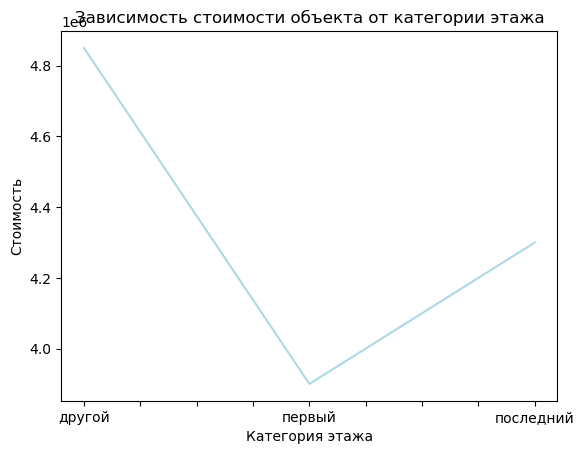

In [110]:
pivot_table_floor_category = data.pivot_table(index = 'floor_category',
                                              values = 'last_price', aggfunc = ['mean', 'count', 'median'])
pivot_table_floor_category.columns = ['mean', 'count', 'median']
pivot_table_floor_category.plot(y = 'median',
                                           title='Зависимость стоимости объекта от категории этажа', 
                                color='lightblue', legend=False)
plt.ylabel("Стоимость")
plt.xlabel("Категория этажа")
pivot_table_floor_category

Зависимость общей (полной) стоимости объекта от дня недели размещения

,mean,count,median
weekday_exposition,,,
1,6.394959e+06,4180,4725000
2,6.627933e+06,3970,4700000
0,6.513001e+06,3611,4650000
3,6.708663e+06,4295,4650000
4,6.373761e+06,3997,4580000
5,6.977671e+06,1935,4550000
6,6.246180e+06,1699,4550000


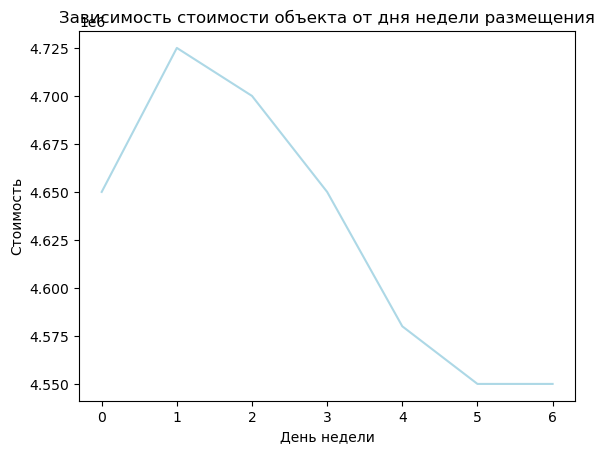

In [111]:
pivot_table_weekday_exposition = data.pivot_table(index = 'weekday_exposition', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
pivot_table_weekday_exposition.columns = ['mean', 'count', 'median']
pivot_table_weekday_exposition.plot(y = 'median',
                                           title='Зависимость стоимости объекта от дня недели размещения', 
                                    color='lightblue', legend=False)
plt.ylabel("Стоимость")
plt.xlabel("День недели")

pivot_table_weekday_exposition.sort_values('median', ascending = False)

Зависимость общей (полной) стоимости объекта от месяца размещения

,mean,count,median
month_exposition,,,
4,6.737198e+06,2379,4800000
9,6.826241e+06,1980,4700000
11,6.461726e+06,2370,4700000
12,7.011731e+06,1641,4700000
2,6.468412e+06,2639,4650000
3,6.363649e+06,2585,4650000
7,6.644408e+06,1694,4650000
1,6.668233e+06,1500,4600000
8,6.353419e+06,1742,4570000


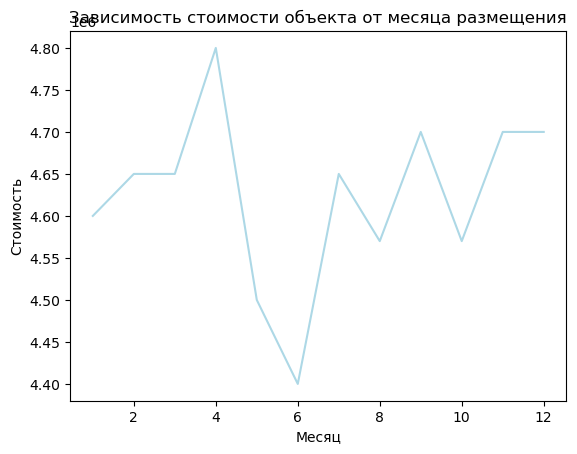

In [112]:
pivot_table_month_exposition = data.pivot_table(index = 'month_exposition', 
                                                values = 'last_price', aggfunc = ['mean', 'count', 'median'])
pivot_table_month_exposition.columns = ['mean', 'count', 'median']
pivot_table_month_exposition.plot(y = 'median',
                                           title='Зависимость стоимости объекта от месяца размещения', 
                                  color='lightblue', legend=False)
plt.ylabel("Стоимость")
plt.xlabel("Месяц")

pivot_table_month_exposition.sort_values('median', ascending = False)

Зависимость общей (полной) стоимости объекта от года размещения

,mean,count,median
year_exposition,,,
2014,1.208714e+07,137,7700000
2015,8.575542e+06,1190,5350000
2019,6.784770e+06,2877,5050000
2016,6.828354e+06,2782,4550000
2018,5.950509e+06,8514,4550000
2017,6.586811e+06,8187,4500000


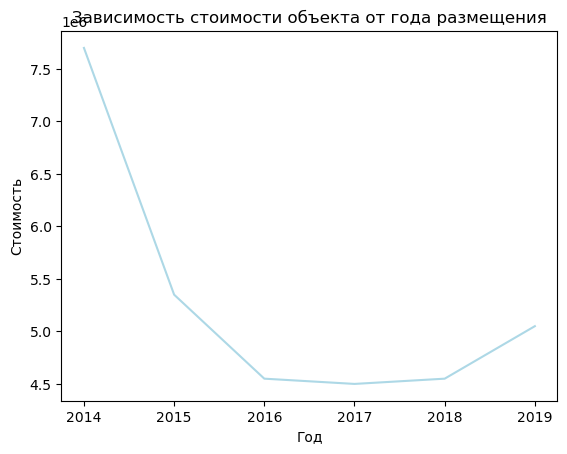

In [113]:
pivot_table_year_exposition = data.pivot_table(index = 'year_exposition', values = 'last_price',
                                               aggfunc = ['mean', 'count', 'median'])
pivot_table_year_exposition.columns = ['mean', 'count', 'median']
pivot_table_year_exposition.plot(y = 'median',
                                           title='Зависимость стоимости объекта от года размещения', 
                                 color='lightblue', legend=False)
plt.ylabel("Стоимость")
plt.xlabel("Год")

pivot_table_year_exposition.sort_values('median', ascending = False)

**Вывод:**  
 - Зависимость стоимости объекта от общей площади, согласно корреляции Пирсона 0,65. Это довольно сильная зависимость. 
 - Зависимость от жилой площади чуть ниже - 0.58, но тоже несомненно имеет место.
 - Зависимость стоимости объекта от площади кухни еще ниже - 0,52, но тоже оказывает влияние.
 - Зависимость стоимости объекта от количества комнат состовляет 0,32. Присутствует, но не сильная. Чем больше комнат, тем выше стоимость.
 - А вот зависимость от категории этажа довольно сильная. Самым "дешевым" этажем является первый, далее идет последний, а за этим все остальные.
 - Стоимость так же зависит от дня недели размещения объявления. Самый "дорогой" день - вторник, а самый "дешевые" - выходные. Попробую предположить, что объявление размещенные в рабочие дни - дело рук риелторов, а в выходные - собственников.
 - Зависимость стоимости от месяца размещения тоже прослеживается. Самым "дешевым" месяцем является июнь, а самым "дорогим" апрель. В остальное время года цена колеблется не сильно. Могу предположить, что понижение стоимости в начале лета связана с сезоном отпусков. Похожие корреляции прослеживаются во всех сферах розничных продаж.  
 - Сильный упадок стоимости прослеживается с 2014 по 2017 года. Далее есть небольшое повышение. Думаю, что это связанно с нестабильностью нашего фондового и валютного рынка. Это они еще не представляли, что случиться в 2019 и 2022 году...  
 Думаю, что было бы логичнее прослеживать зависимость стоимости одного квадратного метра от запрашиваемых параметров. Можно было бы делать чуть более точные выводы.

## Средняя цена одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Населённые пункты с самой высокой и низкой стоимостью квадратного метра. 

Строим сводную таблицу и смотрим на наш топ 10

In [89]:
locality_pivot_table = data.pivot_table(index = 'locality_name', values = 'price_sqr_m', aggfunc=['count', 'mean'])
locality_pivot_table.columns = ['count', 'mean']
locality_pivot_table = locality_pivot_table.sort_values('count', ascending = False).head(10)
locality_pivot_table

,count,mean
locality_name,,
Санкт-Петербург,15712,114831.417880
посёлок Мурино,522,85752.189157
посёлок Шушары,440,78677.364318
Всеволожск,398,68654.473970
Пушкин,369,103125.819377
Колпино,338,75424.579112
посёлок Парголово,327,90175.913089
Гатчина,307,68746.146515
деревня Кудрово,299,92473.547559


Самая высокая стоимость

In [90]:
locality_pivot_table[locality_pivot_table['mean']==locality_pivot_table['mean'].max()]

,count,mean
locality_name,,
Санкт-Петербург,15712,114831.41788


Самая низкая стоимость

In [91]:
locality_pivot_table[locality_pivot_table['mean']==locality_pivot_table['mean'].min()]

,count,mean
locality_name,,
Выборг,237,58141.909325


**Вывод:**  
 Самая высокая стоимость недвижимости в Санкт-Петербурге, где также самое большое количество объявлений. А вот самая низкая стоимость в Выборге. И там же самое низкое количество продаваемых объектов. Тут из чата вышла  инфраструктура, высокие зарплаты, большое количество рабочих мест и качество жизни населения.

## Квартиры в Санкт-Петербурге и средняя цена каждого километра. Как стоимость объектов зависит от расстояния до центра города?

Округляем и выделяем квартиры в Санкт-Петербурге

,price_sqr_m
cityCenters_nearest_km,
0,187960.808588
1,166048.763096
6,152365.950409
2,147660.253377
5,146860.098693
7,141786.352976
4,137544.644453
27,132115.710000
3,129187.722727


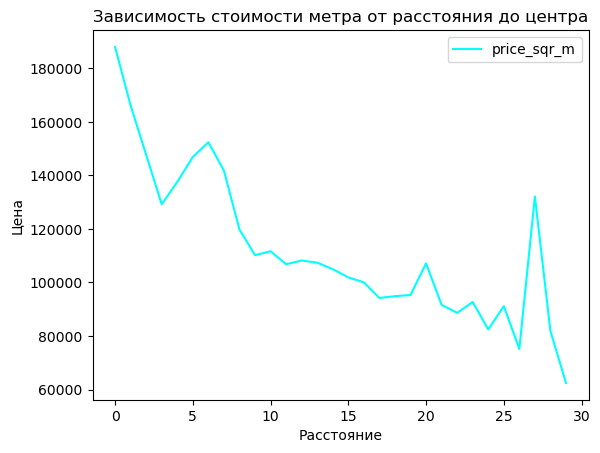

In [92]:
data['cityCenters_nearest_km'] = data['cityCenters_nearest_km'].astype('int')
pivot_table_km = data.query('locality_name == "Санкт-Петербург" and cityCenters_nearest_km != 1000000').pivot_table(index = 'cityCenters_nearest_km', values = 'price_sqr_m', aggfunc = 'mean')
pivot_table_km.plot(title='Зависимость стоимости метра от расстояния до центра', color='aqua')
plt.xlabel("Расстояние")
plt.ylabel("Цена")
pivot_table_km.sort_values(by='price_sqr_m',ascending=False)

**Вывод:**  
Самой дорогой является недвижимость на расстоянии 0,1 и 6 км от центра. Далее прослеживается пстепенный спад стоимости по удалению от центра. Заметен скачок на расстоянии 27 км, не характерный для данного растояния. Проверим, что же там столько может стоить.

In [93]:
data.loc[(data['cityCenters_nearest_km'] == 27) & (data['price_sqr_m'] > 132115)]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_sqr_m,weekday_exposition,month_exposition,year_exposition,floor_category,cityCenters_nearest_km
748,13,14350000,74.0,2017-11-28,2,3.13,5.0,30.0,3,False,...,1496.0,1000000.0,1000000.0,128,193918.92,1,11,2017,другой,27
2948,23,11350000,75.0,2017-08-15,3,3.50,2.0,52.7,2,False,...,216.0,153.0,153.0,207,151333.33,1,8,2017,последний,27
12466,11,15000000,89.6,2017-01-31,3,NaN,3.0,57.0,3,False,...,317.0,509.0,509.0,357,167410.71,1,1,2017,последний,27
15578,20,16000000,101.9,2018-01-08,2,2.87,4.0,48.1,1,False,...,273.0,368.0,368.0,0,157016.68,0,1,2018,первый,27
23316,16,6300000,39.4,2016-05-16,1,3.10,5.0,16.0,2,False,...,966.0,450.0,450.0,232,159898.48,0,5,2016,другой,27


# Общий вывод

 - В работе была выполнена предобработка данных (ознакомились с разбросом даннах, выявили и избавились от аномальных значений, удалии дубликаты, заполнили пропуски и изменили типы данных некоторых колонок). Предполагаю, что данные проблемы были из за того, что о каждой квартире в базе содержится два типа данных: добавленные пользователем и картографические. 
 - Посчитали и добавили в таблицу новые столбцы для дальшнейшего анализа.  
 - Изучили скорость продажи кватрир и выявили неккоректные значения. После очистки данных мы получили среднее значение в 195 дней и медиану в 114 дней.  
 - Выявили зависимости стоимости объекта от различных параметров. Самыми явными параметрами можно считать общую площадь объекта, категорию этажа, день недели и месяц размещения объявления, а так же проследили понижение стоимости недвижимости в 2014-2017 годах. Предполагаю, что зависимость стоимости одного квадратного метра от запрашиваемых параметров дала бы чуть более точные выводы.  
 - Обрисовали стоимость недвижимости в 10 различных городах. Самая высокая стоимость недвижимости в Санкт-Петербурге, а самая низкая стоимость в Выборге.  
 - Так же выявили средную стомость нидвижимости на каждом километре. Самой дорогой является недвижимость на расстоянии 0,1 и 6 км от центра. Далее чем дальше от центра, тем ниже стоимость.  
 Также важно учесть что, рассматривая данные показатели, мы не делали сегментацию рынка. Это может влиять на разного рода зависимости. 
